## Comparing between ATL_CTH_2A and AC__TC__2B

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap

In [2]:
class_path = 'ECA_EXAC_AC__TC__2B_20250525T234738Z_20250526T014041Z_05633D.h5'
cth_path = 'ECA_EXAE_ATL_CTH_2A_20250525T234738Z_20250526T014141Z_05633D.h5'

In [3]:
with open('structure_AC__TC__2B.txt', 'w') as out_file:
    with h5py.File(class_path, 'r') as f:

        def print_structure(name, obj):
            if isinstance(obj, h5py.Group):
                out_file.write(f"[Group] {name}\n")
            elif isinstance(obj, h5py.Dataset):
                out_file.write(f"[Dataset] {name} - shape: {obj.shape}, dtype: {obj.dtype}\n")

            for key, val in obj.attrs.items():
                out_file.write(f"    [attr] {key}: {val}\n")

        f.visititems(print_structure)

        if f.attrs:
            out_file.write("\n[File-level Attributes]\n")
            for key, val in f.attrs.items():
                out_file.write(f"    [attr] {key}: {val}\n")



In [4]:
with open('structure_ATL_CTH_2A.txt', 'w') as out_file:
    with h5py.File(cth_path, 'r') as f:

        def print_structure(name, obj):
            if isinstance(obj, h5py.Group):
                out_file.write(f"[Group] {name}\n")
            elif isinstance(obj, h5py.Dataset):
                out_file.write(f"[Dataset] {name} - shape: {obj.shape}, dtype: {obj.dtype}\n")

            for key, val in obj.attrs.items():
                out_file.write(f"    [attr] {key}: {val}\n")

        f.visititems(print_structure)

        if f.attrs:
            out_file.write("\n[File-level Attributes]\n")
            for key, val in f.attrs.items():
                out_file.write(f"    [attr] {key}: {val}\n")


In [5]:
#--- data from cloud top height
with h5py.File(cth_path, 'r') as f:
    dataset_path = 'ScienceData/ATLID_cloud_top_height'
    cth_data = np.array(f[dataset_path][()])

    time_path = 'ScienceData/time'
    time_data = np.array(f[time_path][()])

In [6]:
mask = cth_data != 9.96921e+36
cth = cth_data[mask]/1000 # convert to km

ref_time = datetime(2000, 1, 1, 0, 0, 0)
cth_time = [ref_time + timedelta(seconds=sec) for sec in time_data[mask]]

In [7]:
#--- data from cloud classification
with h5py.File(class_path, 'r') as f:
    dataset1_path = 'ScienceData/synergetic_target_classification'
    class_data = np.array(f[dataset1_path][()])

    dataset2_path = 'ScienceData/height'
    class_height_data = np.array(f[dataset2_path][()])

    time_path = 'ScienceData/time'
    class_time_data = np.array(f[time_path][()])

In [8]:
class_height = class_height_data/1000 # convert to km

ref_time = datetime(2000, 1, 1, 0, 0, 0)
class_time = [ref_time + timedelta(seconds=sec) for sec in class_time_data]

In [9]:
time_grid, height_grid = np.meshgrid(class_time, np.arange(class_height.shape[1]), indexing='ij')

In [10]:
custom_colors = [
    '#c5c9c7', '#a2653e', '#ffffff', '#ff474c', '#0504aa', '#009337', '#840000',
    '#042e60', '#d8dcd6', '#ffff84', '#f5bf03', '#f97306', '#ff000d', '#5539cc',
    '#2976bb', '#0d75f8', '#014182', '#017b92', '#06b48b', '#aaff32', '#6dedfd',
    '#01f9c6', '#7bc8f6', '#d7fffe', '#a2cffe', '#04d9ff', '#7a9703', '#b2996e',
    '#ffbacd', '#d99b82', '#947e94', '#856798', '#ac86a8', '#59656d', '#76424e',
    '#363737'
]

/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_62112/1206662534.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = ax.pcolormesh(time_grid, class_height, class_data, cmap=cmap, shading='auto')
/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_62112/1206662534.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('compare_cth_to_class.png', dpi=300)


<Figure size 640x480 with 0 Axes>

/Users/jturner/miniconda3/envs/earthcare_analysis/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


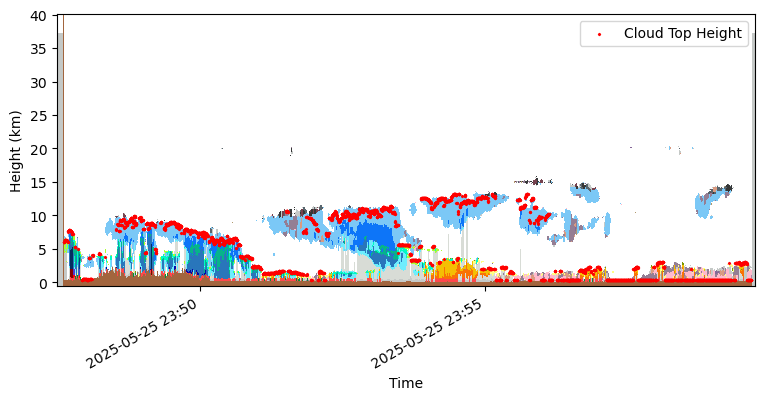

In [11]:
plt.figure()
fig, ax = plt.subplots(figsize=(9, 4))

cmap = ListedColormap(custom_colors)
pcm = ax.pcolormesh(time_grid, class_height, class_data, cmap=cmap, shading='auto')

ax.scatter(cth_time, cth, color='red', marker='x', s=2, label="Cloud Top Height")

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
fig.autofmt_xdate()
ax.legend()

ax.set_title("")
ax.set_xlabel("Time")
ax.set_ylabel("Height (km)")

plt.savefig('compare_cth_to_class.png', dpi=300)
plt.show()